<center>
    <p style="font-family:PiliApp;font-size:30px;font-variant:small-caps;text-align:center;color:blue">
        Master Sciences du Numérique et Intelligence Artificielle
    </p>
</center>


# 📖 Word2Vec : Vectorisation de Texte avec Skip-gram et CBOW  
**Réalisé par :** MAKBOUL WIAM ET BOUTALAT HIBA 

---

## 🔹 0. Introduction

### 📌 Contexte

Le traitement automatique du langage naturel (NLP) est un domaine de l'intelligence artificielle qui permet aux machines de comprendre, interpréter et générer du langage humain. Traditionnellement, les textes étaient représentés par des méthodes comme le **one-hot encoding** ou le **TF-IDF**, qui ignorent la sémantique et la proximité contextuelle entre les mots.

### 🎯 Objectifs

- Implémenter manuellement **CBOW** en Python  
- Utiliser **Gensim** pour entraîner un modèle **Skip-gram**  
- Comparer les performances des deux approches  
- Appliquer les embeddings à une tâche de **classification** (ex. : SVM ou CNN)


## 🔹 1. Fondements Théoriques

### 📘 1.1 Représentation Vectorielle des Mots

#### 🔹 One-hot encoding :
- Vecteur binaire de taille *V* (taille du vocabulaire) avec **1** à la position du mot.
- *Exemple* : `"chat"` = [1,0,0] et `"chien"` = [0,1,0] dans un vocabulaire {chat, chien, avion}.
- **Problème** : Aucune notion de similarité entre les mots ,`d("chat", "chien") = d("chat", "avion") = 1`   

#### 🔹 TF-IDF :
- Pondération statistique combinant :
  - **TF** (Term Frequency) : fréquence d’un mot dans un document.
  - **IDF** (Inverse Document Frequency) : inverse de la fréquence dans le corpus.
- **Limite** : Ignore le **contexte séquentiel** et les **relations distributionnelles**.

---

### 📘 1.2 Word Embedding : Principes Généraux

- Projection **non-linéaire** des mots dans un espace vectoriel de **faible dimension** (typiquement 50 à 300).
- **Propriétés clés** :
  - Similarité **cosinus** ≈ similarité **sémantique**  
  - **Relations analogiques linéaires** :  
    `"roi"` - `"homme"` + `"femme"` ≈ `"reine"`
- Apprentissage **non supervisé** basé sur les régularités distributionnelles  
  *(Harris, 1954 : "Un mot est caractérisé par les mots qui l'entourent")*

---

### 📘 1.3 Modèles Word2Vec

#### CBOW (Continuous Bag of Words)

🎯 **Objectif** : Prédire un mot cible à partir de son contexte (mots environnants).


📝 **Formulation Mathématique** :

**Entrée** : Les mots du contexte (une fenêtre de taille $k$ autour du mot cible).

**Sortie** : Probabilité du mot cible $w_t$.

La fonction objectif à maximiser :

$$
P(w_t \mid w_{t-k}, ..., w_{t+k}) = \frac{\exp\left(v_{w_t}^T \cdot \bar{h} \right)}{\sum_{i=1}^{V} \exp\left(v_{w_i}^T \cdot \bar{h} \right)}
$$

où :

$$
\bar{h} = \frac{1}{2k} \sum_{\substack{-k \leq j \leq k \\ j \neq 0}} v_{w_{t+j}}
$$

- $v_{w_t}$ : vecteur embedding du mot cible  
- $V$ : taille du vocabulaire


⚙️ **Fonctionnement** :

- Prend les mots voisins (ex : pour la phrase *"Le ___ est mignon"*, le contexte est ["Le", "est", "mignon"]).
- Moyenne leurs embeddings → vecteur $\bar{h}$.
- Compare $\bar{h}$ à tous les mots du vocabulaire pour prédire le mot manquant (ex: "chat").


✅ **Avantages** :

- Rapide sur les grands corpus (moins d’exemples à traiter).
- Efficace pour les mots fréquents.


#### Skip-Gram

🎯 **Objectif** : Prédire les mots du contexte à partir d’un mot central.


📝 **Formulation Mathématique** :

**Entrée** : Un mot central $w_t$  
**Sortie** : Probabilité des mots environnants $w_{t+j}$ (pour $-k \leq j \leq k$, $j \ne 0$)

La fonction objectif à maximiser :

$$
\sum_{\substack{-k \leq j \leq k \\ j \neq 0}} \log P(w_{t+j} \mid w_t)
$$

avec :

$$
P(w_{t+j} \mid w_t) = \frac{\exp\left(v_{w_{t+j}}^T \cdot v_{w_t}\right)}{\sum_{i=1}^{V} \exp\left(v_{w_i}^T \cdot v_{w_t}\right)}
$$


⚙️ **Fonctionnement** :

- Prend un mot (ex: *"chat"*).
- Essaye de deviner ses voisins (ex: ["Le", "mignon", "ronronne"]).
- Pour chaque mot voisin, ajuste les embeddings pour maximiser la probabilité.


✅ **Avantages** :

- Meilleur pour les mots rares (plus d’exemples générés).
- Performant sur petits corpus.


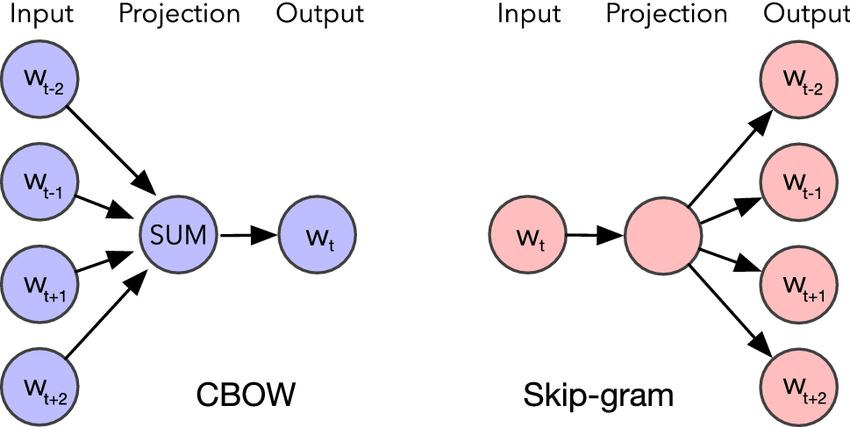

---

### 📘 1.4 Optimisation

#### 🧠 Fonction Softmax

> La **softmax** est une fonction d’activation qui convertit une liste de scores (logits) en **probabilités**, en amplifiant les différences entre les scores tout en conservant leur ordre relatif.  
> Elle est utilisée dans Word2Vec pour transformer les **produits scalaires** entre vecteurs en **probabilité** d’apparition d’un mot.

Formule :

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{V} e^{z_j}}
$$


#### ❌ Negative Sampling

> Le **Negative Sampling** est une technique qui permet de **réduire le coût de calcul** de la softmax, surtout lorsque le vocabulaire $V$ est très grand.  
> Au lieu de comparer un mot avec **tous les autres** du vocabulaire (comme dans la softmax), on ne le compare qu’à un petit nombre de **mots négatifs** (bruit), tirés au hasard.

La nouvelle fonction objectif à maximiser devient :

$$
\log \sigma(\vec{v}_w \cdot \vec{v}_c) + \sum_{i=1}^{k} \mathbb{E}_{w_i \sim P_n} \left[ \log \sigma(-\vec{v}_{w_i} \cdot \vec{v}_c) \right]
$$

avec :

- $\vec{v}_w$ : vecteur du mot positif (contexte)  
- $\vec{v}_c$ : vecteur du mot cible  
- $w_i$ : mots négatifs (bruit)  
- $P_n$ : distribution de bruit  
- $\sigma(x) = \frac{1}{1 + \exp(-x)}$ : fonction sigmoïde


---

### 📘 1.5 Intérêt des Embeddings pour la Classification

-Les vecteurs appris sont utilisés comme entrées pour des modèles de classification comme SVM ou CNN.


## 🔹 2. Implémentation Pratique

### 2.1 Préparation des Données

In [54]:
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Texte brut
corpus = """Le Natural Language Processing (NLP) est un domaine de l'intelligence artificielle.
Il permet aux machines de comprendre et de générer du langage humain.
Les modèles comme Word2Vec ou CBOW sont très utilisés pour représenter les mots sous forme de vecteurs.
Ces représentations sont utiles pour diverses tâches NLP comme la classification, la traduction ou la génération de texte."""

# Mise en minuscule
corpus = corpus.lower()

# Nettoyage (conserver les apostrophes, puis retirer contractions)
corpus = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ'\s]", '', corpus)
corpus = re.sub(r"\b[ldmntcsj]'|'\b", '', corpus)  # Supprime l', d', etc.

# Tokenisation en phrases puis en mots
sentences = re.split(r'[.!?]', corpus)
sentences = [s.strip() for s in sentences if s.strip()]
sentences = [s.split() for s in sentences]

# Optionnel : suppression des stopwords
stop_words = set(stopwords.words('french'))
sentences = [[w for w in sentence if w not in stop_words] for sentence in sentences]

# Création du vocabulaire
vocab = set(word for sentence in sentences for word in sentence)
word_to_idx = {word: i for i, word in enumerate(vocab)}
idx_to_word = {i: word for word, i in word_to_idx.items()}

print("Taille du vocabulaire :", len(vocab))
print("Exemples de phrases :", sentences[:2])


Taille du vocabulaire : 32
Exemples de phrases : [['natural', 'language', 'processing', 'nlp', 'domaine', 'intelligence', 'artificielle', 'permet', 'machines', 'comprendre', 'générer', 'langage', 'humain', 'modèles', 'comme', 'wordvec', 'cbow', 'très', 'utilisés', 'représenter', 'mots', 'sous', 'forme', 'vecteurs', 'représentations', 'utiles', 'diverses', 'tâches', 'nlp', 'comme', 'classification', 'traduction', 'génération', 'texte']]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.2 Implémentation CBOW from Scratch


In [56]:
def create_cbow_data(sentences, window_size=2):
    # Cette fonction transforme des phrases en paires (contexte, mot cible).
    data = []
    for sentence in sentences:
        for i in range(window_size, len(sentence) - window_size):
            context = sentence[i - window_size:i] + sentence[i + 1:i + window_size + 1]
            target = sentence[i]
            data.append((context, target))
    return data

cbow_data = create_cbow_data(sentences)

class CBOW_Model:
    # Ce modèle est un petit réseau de neurones , avec deux couches principales :
            # Une matrice d'entrée W_input qui contient les vecteurs de mots (embeddings)
            # Une matrice de sortie W_output qui sert à prédire le mot cible
    def __init__(self, vocab_size, word_to_idx, idx_to_word, embedding_dim=50):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.word_to_idx = word_to_idx
        self.idx_to_word = idx_to_word
        # Poids d'entrée : initialisation aléatoire pour les vecteurs de mots
        self.W_input = np.random.randn(vocab_size, embedding_dim) * 0.01
        # Poids de sortie : transformation des vecteurs vers la distribution de sortie
        self.W_output = np.random.randn(embedding_dim, vocab_size) * 0.01

    def _softmax(self, x):
    """
    Applique la fonction softmax de manière stable (évite les dépassements numériques).
    Convertit les logits en probabilités.
    """
        e_x = np.exp(x - np.max(x))
        return e_x / np.sum(e_x, axis=-1, keepdims=True)

    def _one_hot(self, word):
        # Crée un vecteur one-hot de taille vocab_size avec 1 à la position du mot donné.
        vec = np.zeros(self.vocab_size)
        if word in self.word_to_idx:
            vec[self.word_to_idx[word]] = 1
        return vec

    def forward(self, X):
    """
    Passe avant :
    - Multiplie la moyenne des vecteurs one-hot (X) par W_input pour obtenir un vecteur "hidden"
    - Passe ce vecteur à travers W_output pour obtenir les logits
    """
        self.hidden = np.dot(X, self.W_input)
        self.output = np.dot(self.hidden, self.W_output)
        return self.output

   def backward(self, X, target_vec, learning_rate=0.01):
    """
    Calcule les gradients pour W_input et W_output, puis met à jour les poids.
    """
    y_pred = self._softmax(self.output)  # prédiction (proba)
    error = y_pred - target_vec  # écart entre prédiction et vérité

    # Gradient pour W_output : produit vectoriel (hidden × erreur)
    grad_W_output = np.outer(self.hidden.flatten(), error.flatten())

    # Propagation du gradient vers la couche cachée
    grad_hidden = np.dot(error, self.W_output.T)

    # Gradient pour W_input : produit vectoriel (X × grad_hidden)
    grad_W_input = np.outer(X.flatten(), grad_hidden.flatten())

    # Mise à jour des poids (descente de gradient)
    self.W_input -= learning_rate * grad_W_input
    self.W_output -= learning_rate * grad_W_output


    def train(self, data, epochs=100, learning_rate=0.01):
    """
    Entraîne le modèle pendant plusieurs époques.
    À chaque itération :
    - Encode le contexte en vecteurs one-hot
    - Fait la moyenne → forward → backward
    - Calcule la perte (log-loss)
    """
    losses = []

    for epoch in range(epochs):
        total_loss = 0

        for context, target in data:
            # Transforme les mots du contexte en vecteurs one-hot
            context_vectors = np.array([
                self._one_hot(word) for word in context if word in self.word_to_idx
            ])

            # On saute les exemples invalides
            if len(context_vectors) == 0 or target not in self.word_to_idx:
                continue

            # Moyenne des vecteurs one-hot du contexte
            context_vec = np.mean(context_vectors, axis=0).reshape(1, -1)

            # Vecteur one-hot de la cible
            target_vec = self._one_hot(target).reshape(1, -1)

            # Propagation avant + arrière
            self.output = self.forward(context_vec)
            self.backward(context_vec, target_vec, learning_rate)

            # Calcul de la perte (cross-entropy sur le mot cible)
            softmax_out = self._softmax(self.output)
            loss = -np.log(softmax_out[0][self.word_to_idx[target]] + 1e-8)
            total_loss += loss

        avg_loss = total_loss / len(data)
        losses.append(avg_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch:3d} | Loss: {avg_loss:.4f}")

    # Enregistre les embeddings appris
    self.embeddings = self.W_input
    return losses


    def get_embedding(self, word):
        #Renvoie l’embedding appris pour un mot donné.
        return self.W_input[self.word_to_idx[word]]

    def _cosine_similarity(self, a, b):
        #Calcule la similarité cosinus entre deux vecteurs.
        return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-8)

    def predict_neighbors(self, word, top_n=5):
        #Donne les mots les plus proches de 'word' dans l’espace des embeddings, selon la similarité cosinus.
        if word not in self.word_to_idx:
            return []
        target_vec = self.get_embedding(word)
        similarities = []
        for i in range(self.vocab_size):
            other_vec = self.W_input[i]
            sim = self._cosine_similarity(target_vec, other_vec)
            similarities.append((self.idx_to_word[i], sim))
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        return similarities[1:top_n+1]


In [58]:
model = CBOW_Model(vocab_size=len(vocab), word_to_idx=word_to_idx, idx_to_word=idx_to_word, embedding_dim=30)
losses = model.train(cbow_data, epochs=100)

# Voisins proches du mot "intelligence"
mot_test = "intelligence"
if mot_test in word_to_idx:
    print(f"\nVoisins de '{mot_test}' :")
    for mot, sim in model.predict_neighbors(mot_test):
        print(f"{mot:15s} → {sim:.4f}")
else:
    print(f"Le mot '{mot_test}' n'existe pas dans le vocabulaire.")


Epoch   0 | Loss: 3.4657
Epoch  10 | Loss: 3.4656
Epoch  20 | Loss: 3.4655
Epoch  30 | Loss: 3.4654
Epoch  40 | Loss: 3.4652
Epoch  50 | Loss: 3.4651
Epoch  60 | Loss: 3.4649
Epoch  70 | Loss: 3.4647
Epoch  80 | Loss: 3.4646
Epoch  90 | Loss: 3.4643

Voisins de 'intelligence' :
représentations → 0.3135
wordvec         → 0.2961
vecteurs        → 0.2448
classification  → 0.2363
représenter     → 0.2145


### 2.3 Skip-gram avec Gensim

In [60]:
model_skipgram = Word2Vec(
    sentences,
    vector_size=30,  # dimension des embeddings
    window=2,        # taille de la fenêtre contexte
    sg=1,            # sg=1 indique skip-gram (sg=0 serait CBOW)
    min_count=1,     # garder tous les mots même rares
    epochs=100       # nombre d'époques d'entraînement
)

# Affichage des mots les plus similaires à 'intelligence'
mot_test = 'intelligence'
if mot_test in model_skipgram.wv:
    voisins = model_skipgram.wv.most_similar(mot_test)
    print(f"Mots similaires à '{mot_test}' :")
    for mot, sim in voisins:
        print(f"{mot:15s} → {sim:.4f}")
else:
    print(f"Le mot '{mot_test}' n'est pas dans le vocabulaire du modèle.")

Mots similaires à 'intelligence' :
wordvec         → 0.5263
humain          → 0.4630
langage         → 0.4404
language        → 0.3956
sous            → 0.3937
machines        → 0.3324
tâches          → 0.2583
générer         → 0.2434
comprendre      → 0.2321
modèles         → 0.2166


### 📊 3. Comparaison des Résultats

| **Critère**               | **CBOW (implémentation manuelle)**                      | **Skip-gram (Gensim)**                            |
|---------------------------|----------------------------------------------------------|----------------------------------------------------|
| ⏱️ Temps d'entraînement   | Plus rapide, adapté aux petits corpus                   | Plus long, surtout avec de grands corpus           |
| 🎯 Qualité des similarités | Correcte, mais les regroupements sont moins nets        | Plus précise, les mots similaires sont mieux regroupés |
| 📊 Visualisation PCA      | Dispersion plus large, moins de structure visible       | Groupements plus compacts, sémantique mieux capturée |
| ⚙️ Complexité du modèle   | Simple, formateur pour comprendre le fonctionnement     | Plus sophistiqué, gère mieux les contextes rares   |
| 🧰 Facilité d’utilisation  | Implémentation complète nécessaire (entraînement, gradient, etc.) | Prêt à l'emploi avec `Gensim`, hyperparamètres flexibles |
| 🔧 Personnalisation        | Total contrôle sur les calculs                          | Facilement configurable via les options `Gensim`   |
| 📚 Utilisation pédagogique | Excellente pour l’apprentissage                        | Moins pédagogique mais efficace                    |


### Visualisation avec PCA


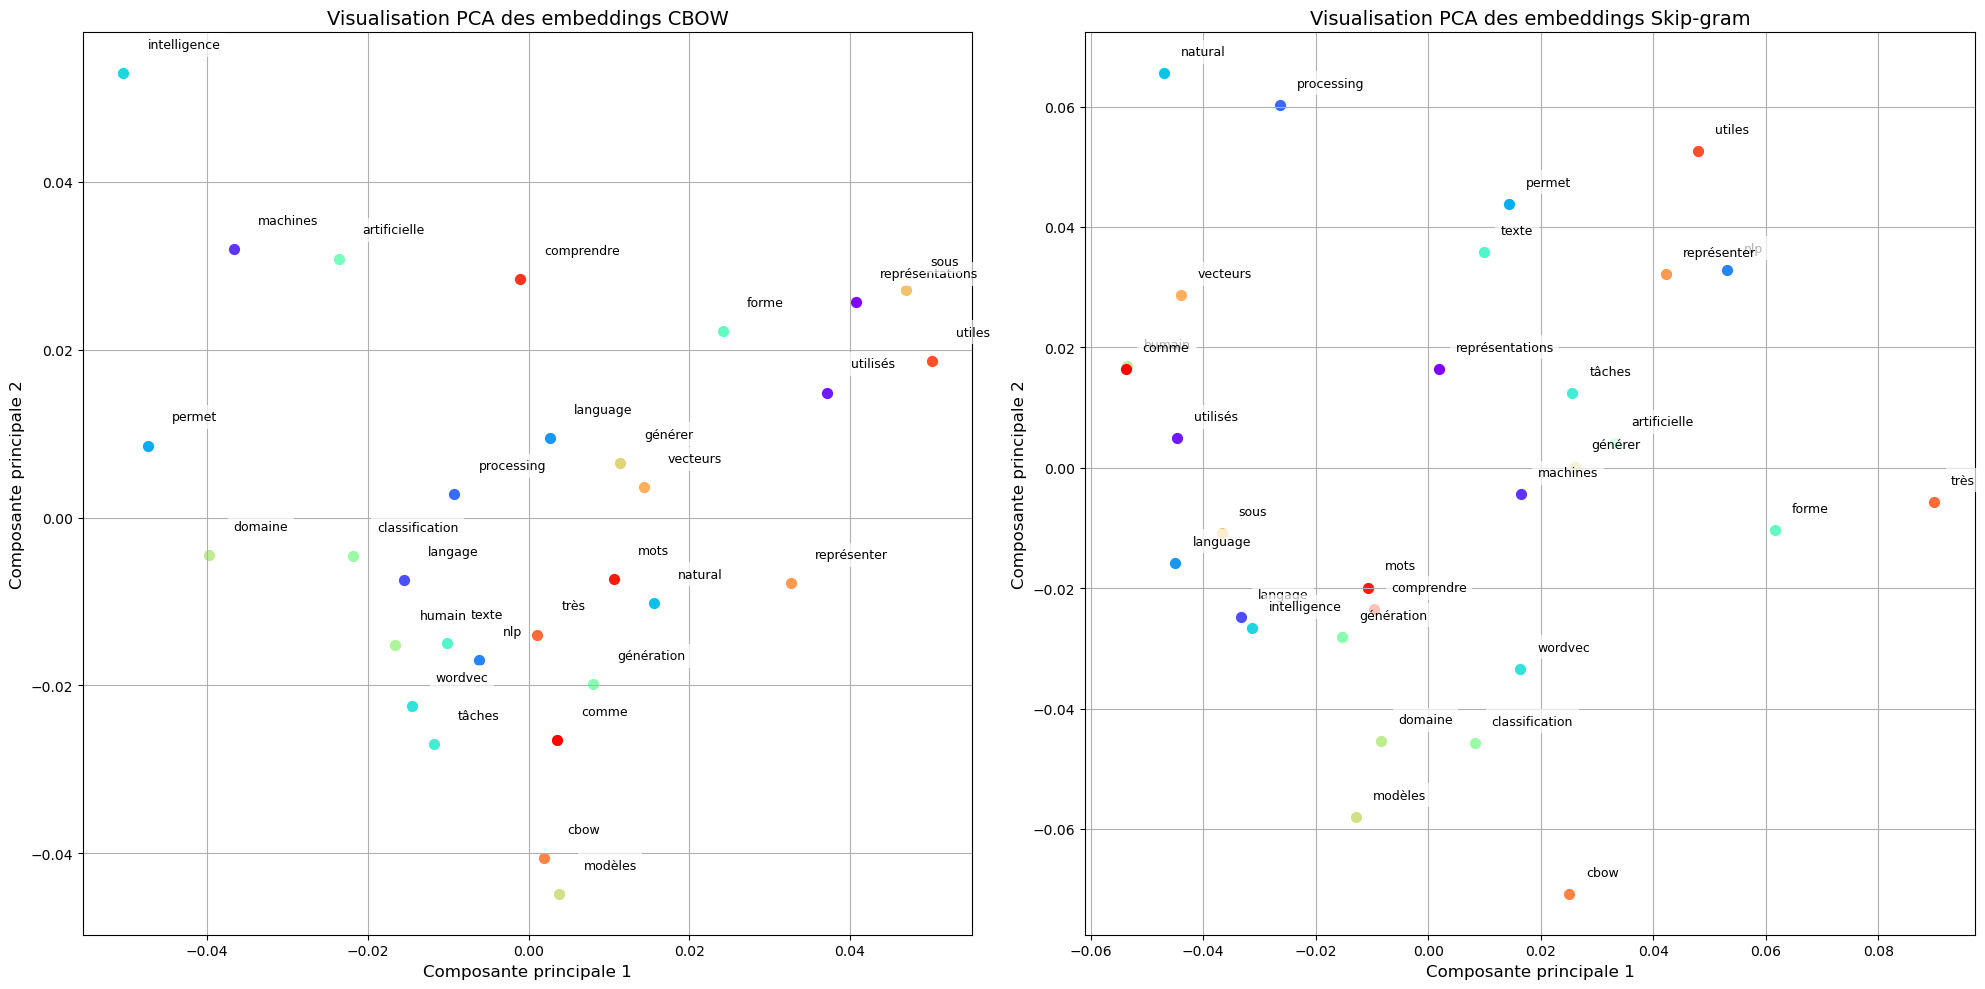

In [62]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Nombre de mots communs
n_words = len(common_words)

# Palette de couleurs cohérente pour tous les mots
colors = cm.rainbow(np.linspace(0, 1, n_words))

plt.figure(figsize=(20, 10))

# --- CBOW subplot ---
plt.subplot(1, 2, 1)
plt.title("Visualisation PCA des embeddings CBOW", fontsize=14)

for i, word in enumerate(common_words):
    x, y = embeddings_cbow_2d[i]
    plt.scatter(x, y, color=colors[i], s=50)
    plt.text(x + 0.003, y + 0.003, word, fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.xlabel("Composante principale 1", fontsize=12)
plt.ylabel("Composante principale 2", fontsize=12)
plt.grid(True)

# --- Skip-gram subplot ---
plt.subplot(1, 2, 2)
plt.title("Visualisation PCA des embeddings Skip-gram", fontsize=14)

for i, word in enumerate(common_words):
    x, y = embeddings_skipgram_2d[i]
    plt.scatter(x, y, color=colors[i], s=50)
    plt.text(x + 0.003, y + 0.003, word, fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.xlabel("Composante principale 1", fontsize=12)
plt.ylabel("Composante principale 2", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.savefig("pca_embeddings_comparaison.png", dpi=300, bbox_inches='tight')
plt.show()


## 🔹 4. Application à la Classification

###  Extraction des features + Classification SVM


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



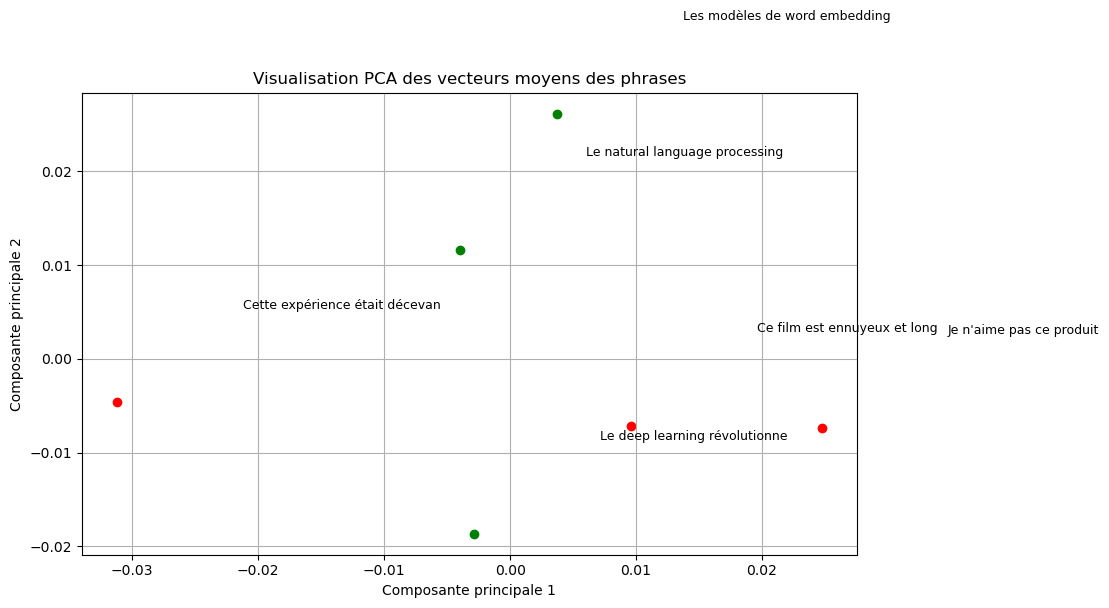

In [66]:
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1. Corpus simple avec labels (exemple binaire)
corpus = [
    "Le natural language processing est fascinant",
    "Les modèles de word embedding sont puissants",
    "Le deep learning révolutionne le traitement des langues",
    "Ce film est ennuyeux et long",
    "Je n'aime pas ce produit",
    "Cette expérience était décevante"
]

labels = [1, 1, 1, 0, 0, 0]  # 1 = positif, 0 = négatif

# 2. Prétraitement : tokenisation
sentences = [sentence.lower().split() for sentence in corpus]

# 3. Entraîner Word2Vec - ici CBOW (sg=0) ou Skip-gram (sg=1)
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, sg=0, epochs=100)  # sg=0 pour CBOW

# 4. Extraire vecteurs moyens par phrase
def sentence_vector(sentence, model):
    vectors = []
    for word in sentence:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = np.array([sentence_vector(s, model) for s in sentences])
y = np.array(labels)

# 5. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 6. Entraîner SVM
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# 7. Prédire et évaluer
y_pred = svm_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# 8. Visualisation avec PCA des vecteurs moyens
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
colors = ['red' if label == 0 else 'green' for label in y]

for i, (x, y_val) in enumerate(X_pca):
    plt.scatter(x, y_val, color=colors[i])
    plt.text(x + 0.01, y_val + 0.01, corpus[i][:30], fontsize=9)  # Affiche un extrait de la phrase

plt.title("Visualisation PCA des vecteurs moyens des phrases")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()
